In [89]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
train = pd.read_csv('Santander_train.csv')
test  = pd.read_csv('Santander_test.csv') 

train.shape , test.shape 

((76020, 371), (75818, 370))

In [92]:
X = train.drop(['TARGET'] , axis = 1)
y = train.TARGET 

X.shape , y.shape 

((76020, 370), (76020,))

In [93]:
from sklearn.model_selection import train_test_split 

In [94]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 0 , stratify = y , test_size = 0.2)

In [95]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape 

((60816, 370), (15204, 370), (60816,), (15204,))

In [96]:
col = X_train.columns 
len(col)

370

In [97]:
col = pd.DataFrame(col)
col.columns = ['Var']
col['Index'] = col.index

col

,Var,Index
0,ID,0
1,var3,1
2,var15,2
3,imp_ent_var16_ult1,3
4,imp_op_var39_comer_ult1,4
...,...,...
365,saldo_medio_var44_hace2,365
366,saldo_medio_var44_hace3,366
367,saldo_medio_var44_ult1,367
368,saldo_medio_var44_ult3,368


### Removing Constant 

In [98]:
from sklearn.feature_selection import VarianceThreshold 

In [99]:
filter_applied = VarianceThreshold(0.0) 


In [100]:
filter_applied.fit(X_train)


VarianceThreshold(threshold=0.0)

In [101]:
features = filter_applied.get_support()
features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [102]:
X_train = filter_applied.transform(X_train)
X_test = filter_applied.transform(X_test) 

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [103]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,324,325,326,327,328,329,330,331,332,333
0,130807.0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
1,78981.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85472.340000
2,50325.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317769.240000
3,146646.0,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76209.960000
4,136536.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302754.000000


In [104]:
features= pd.DataFrame(features)
features.columns = ['Bool']
features['Index'] = features.index

In [105]:
features.head()

,Bool,Index
0,True,0
1,True,1
2,True,2
3,True,3
4,True,4


In [106]:
col['Bool'] = features['Bool']
col.head()

,Var,Index,Bool
0,ID,0,True
1,var3,1,True
2,var15,2,True
3,imp_ent_var16_ult1,3,True
4,imp_op_var39_comer_ult1,4,True


In [107]:
col = col[col['Bool'] == True] 

In [108]:
col.shape 

(334, 3)

In [109]:
features_X = col['Var']
features_X

0                           ID
1                         var3
2                        var15
3           imp_ent_var16_ult1
4      imp_op_var39_comer_ult1
                ...           
365    saldo_medio_var44_hace2
366    saldo_medio_var44_hace3
367     saldo_medio_var44_ult1
368     saldo_medio_var44_ult3
369                      var38
Name: Var, Length: 334, dtype: object

In [110]:
X_train.columns = features_X
X_test.columns =  features_X 

X_train.head()

Var,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,130807.0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
1,78981.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85472.340000
2,50325.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317769.240000
3,146646.0,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76209.960000
4,136536.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302754.000000


In [111]:
X_train[X_train['ID'] == 1] 

#Okay , so sorting on the baiss of ID needs to be done 

Var,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
30090,1.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17


## Removing Quasi Constant 

In [112]:
filter_applied_2 = VarianceThreshold(0.02) 

In [113]:
filter_applied_2.fit(X_train) 

VarianceThreshold(threshold=0.02)

In [114]:
X_train = filter_applied_2.transform(X_train)
X_test = filter_applied_2.transform(X_test) 

In [115]:
features = filter_applied_2.get_support() 
features = pd.DataFrame(features)
features.columns = ['Bool']
features['Index'] = features.index 
features.shape

(334, 2)

In [120]:
features[features['Bool'] == True].shape 

(265, 2)

In [121]:
col.shape 

(334, 3)

In [124]:
features

,Bool,Index
0,True,0
1,True,1
2,True,2
3,True,3
4,True,4
...,...,...
329,True,329
330,True,330
331,True,331
332,True,332


In [125]:
col

,Var,Index,Bool
0,ID,0,True
1,var3,1,True
2,var15,2,True
3,imp_ent_var16_ult1,3,True
4,imp_op_var39_comer_ult1,4,True
...,...,...,...
365,saldo_medio_var44_hace2,365,NaN
366,saldo_medio_var44_hace3,366,NaN
367,saldo_medio_var44_ult1,367,NaN
368,saldo_medio_var44_ult3,368,NaN


In [142]:
#col.reset_index()
col.drop(['Index' ,'index'],axis = 1 ,inplace=True)
col

,level_0,Var,Bool
0,0,ID,True
1,1,var3,True
2,2,var15,True
3,3,imp_ent_var16_ult1,True
4,4,imp_op_var39_comer_ult1,True
...,...,...,...
329,329,saldo_medio_var44_hace2,NaN
330,330,saldo_medio_var44_hace3,NaN
331,331,saldo_medio_var44_ult1,NaN
332,332,saldo_medio_var44_ult3,NaN


In [143]:
col['Bool'] = features['Bool']
col

,level_0,Var,Bool
0,0,ID,True
1,1,var3,True
2,2,var15,True
3,3,imp_ent_var16_ult1,True
4,4,imp_op_var39_comer_ult1,True
...,...,...,...
329,329,saldo_medio_var44_hace2,True
330,330,saldo_medio_var44_hace3,True
331,331,saldo_medio_var44_ult1,True
332,332,saldo_medio_var44_ult3,True


In [144]:
col[col['Bool'] == True].shape

(265, 3)

In [148]:
col = col[col['Bool'] == True] 
features = col['Var'] 

In [149]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.columns = features
X_test.columns = features

In [150]:
X_train

Var,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,130807.0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
1,78981.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85472.340000
2,50325.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317769.240000
3,146646.0,2.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76209.960000
4,136536.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302754.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60811,123059.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48888.000000
60812,37667.0,2.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55244.850000
60813,66198.0,2.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75404.010000
60814,102039.0,2.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [165]:
col

,Var,Bool
0,ID,True
1,var3,True
2,var15,True
3,imp_ent_var16_ult1,True
4,imp_op_var39_comer_ult1,True
...,...,...
329,saldo_medio_var44_hace2,True
330,saldo_medio_var44_hace3,True
331,saldo_medio_var44_ult1,True
332,saldo_medio_var44_ult3,True


In [166]:
col['Index'] = [i for i in range(265)]
col

,Var,Bool,Index
0,ID,True,0
1,var3,True,1
2,var15,True,2
3,imp_ent_var16_ult1,True,3
4,imp_op_var39_comer_ult1,True,4
...,...,...,...
329,saldo_medio_var44_hace2,True,260
330,saldo_medio_var44_hace3,True,261
331,saldo_medio_var44_ult1,True,262
332,saldo_medio_var44_ult3,True,263


## Duplicate Feature Removal 

In [205]:
X_train_T = X_train.T 
X_test_T = X_test.T 

In [206]:
X_train_T = pd.DataFrame(X_train_T)
X_test_T = pd.DataFrame(X_test_T)

In [207]:
duplicated_features = X_train_T.duplicated()

In [214]:
duplicated_features = pd.DataFrame(duplicated_features)
duplicated_features.columns = ['Bool']
duplicated_features


,Bool
Var,
ID,False
var3,False
var15,False
imp_ent_var16_ult1,False
imp_op_var39_comer_ult1,False
...,...
saldo_medio_var44_hace2,False
saldo_medio_var44_hace3,False
saldo_medio_var44_ult1,False


In [216]:
X_train_T['Bool'] = duplicated_features['Bool']
X_test_T['Bool'] = duplicated_features['Bool']

In [217]:
X_train = X_train_T[X_train_T['Bool'] == False].T 
X_test = X_test_T[X_test_T['Bool'] == False].T

In [228]:
X_train.shape ,X_test.shape 

((60818, 265), (15205, 265))

In [229]:
X_test

Var,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,38893,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26033
1,133597,2,52,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,125619
2,24908,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,91102.4
3,19551,2,9,900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.16249e+06
4,36051,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,138295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15200,66259,2,28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117311
15201,44895,2,26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,216320
15202,33938,2,76,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,218030
15203,62793,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,59606.5


In [230]:
X_train.drop('Var',axis = 0,inplace=True)
X_train.drop('Bool',axis = 0 ,inplace=True)

#X_test.drop('Var',axis = 0)
X_test.drop('Bool',axis = 0,inplace=True) 


X_train

Var,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,130807,2,26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117311
1,78981,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,85472.3
2,50325,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,317769
3,146646,2,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,76210
4,136536,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,302754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60811,123059,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48888
60812,37667,2,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,55244.8
60813,66198,2,41,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,75404
60814,102039,2,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117311


In [231]:
a = X_train['ID'][0]
type(a)

float

In [232]:
X_train.sort_values(by ='ID',inplace=True)
X_test.sort_values(by = 'ID',inplace=True)



In [235]:
X_train

Var,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
30090,1,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39205.2
21330,3,2,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,49278
31064,4,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,67333.8
40948,8,2,37,0,195,195,0,0,0,0,...,0,0,0,0,0,0,0,0,0,64008
41045,10,2,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23984,151829,2,48,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,60926.5
13284,151830,2,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,118635
6916,151835,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,74028.1
17819,151836,2,25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,84278.2


In [236]:
X_test

Var,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
14133,13,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,87975.8
5834,25,2,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,125424
10450,31,2,43,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,118437
13633,45,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,69165
1793,49,2,27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,63445.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14475,151804,2,75,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117311
10063,151805,2,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,80567
4697,151809,2,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,64250.5
7200,151810,2,45,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,117311


### Great Now we've done some of the most basic Feature selection . Let's move onto some advanced Feature selection and let's see what we can do . First let's analyse about the feature selection we should use further 

# Okay Now that we're done with basic feature selection , let's see what are the option available to us for the further feature selection and analysis  
<br>
<br>

-> SelectKBest <br>
-> Mutual Information Gain <br> 
-> Fischer Test  <br> 
-> ANOVA test <br>

<br>
<br>

So this are some of the basic Filter methods we can use <br>
<br>

There is no point of using Wrapper method because using it on some 250 features isn't infeasible . It will take a life to do so<br>

<br>

As far as Embedded Methods are concerned ,let's see what we can do from LASSO and RIDGE Regression <br><br>
First let's see some of the basic filter methods 


## 1) Mutual_Info_Gain 

In [248]:
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()

Information Gain or Mutual Information Gain measures how much information the presense/absense of a feature contributes in correctly predicting the outcome

Mutual information measures the information that X and Y share: It measures how much knowing one of these variables reduces uncertainty about the other. For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. At the other extreme, if X is a deterministic function of Y and Y is a deterministic function of X then all information conveyed by X is shared with Y: knowing X determines the value of Y and vice versa. As a result, in this case the mutual information is the same as the uncertainty contained in Y (or X) alone, namely the entropy of Y (or X). Moreover, this mutual information is the same as the entropy of X and as the entropy of Y. (A very special case of this is when X and Y are the same random variable.)

Since this is a classification problem , so we'll use Mutual_info_classif 

In [249]:
from sklearn.feature_selection import mutual_info_classif 

In [279]:
ml = mutual_info_classif(X_train_1,y_train)

In [288]:
ml = pd.DataFrame(ml)
#ml.columns = ['val']
ml['Feature'] = X_train_1.columns 
ml.columns = ['val','Feature']

In [289]:
ml.sort_values(by = 'val',ascending=False,inplace=True)
ml

,val,Feature
20,0.012594,ind_var5_0
48,0.011551,num_var5_0
97,0.010302,num_var41_0
43,0.010169,ind_var39_0
44,0.009975,ind_var41_0
...,...,...
141,0.000000,delta_imp_venta_var44_1y3
142,0.000000,delta_num_aport_var13_1y3
143,0.000000,delta_num_aport_var17_1y3
144,0.000000,delta_num_aport_var33_1y3


In [290]:
ml['index'] = ml.index

In [291]:
ml

,val,Feature,index
20,0.012594,ind_var5_0,20
48,0.011551,num_var5_0,48
97,0.010302,num_var41_0,97
43,0.010169,ind_var39_0,43
44,0.009975,ind_var41_0,44
...,...,...,...
141,0.000000,delta_imp_venta_var44_1y3,141
142,0.000000,delta_num_aport_var13_1y3,142
143,0.000000,delta_num_aport_var17_1y3,143
144,0.000000,delta_num_aport_var33_1y3,144


In [293]:
ml[ml['val'] == 0.00000000].shape 

(122, 3)

So one thing we observe that since the number of features are very large and in some way or the other each feature is a contributing factor is determining whether the user is satisfied or not , so Mutual Information is not of much use in feature selection methods for this santander dataset 
<br><br>

But one thing we can observe from this Information Gain that there are 105 features that don't have any relation with the targeted output , so atleast 1 thing we can do and that is remove this 105 features from our Datasets 

In [294]:
ml1 = ml[ml['val'] != 0.00000000] 

In [295]:
ml.shape  , ml1.shape 

((265, 3), (143, 3))

In [ ]:
ml

In [354]:
bool_val = [] 
for i in range(265) :
    if(ml['val'][i] != 0.00000000 ) :
        bool_val.append(True)
    else :
        bool_val.append(False)
        
bool_val = pd.DataFrame(bool_val)
bool_val.columns = ['Bool']

In [355]:
a = pd.DataFrame(bool_val['Bool'].value_counts())
a

,Bool
True,143
False,122


In [356]:
ml['Bool'] = bool_val['Bool']

In [357]:
ml

,val,Feature,index,Bool
0,0.000000,ID,0,False
1,0.000000,var3,1,False
2,0.000394,var15,2,True
3,0.000000,imp_ent_var16_ult1,3,False
4,0.000300,imp_op_var39_comer_ult1,4,True
...,...,...,...,...
260,0.000935,saldo_medio_var44_hace2,260,True
261,0.000000,saldo_medio_var44_hace3,261,False
262,0.000000,saldo_medio_var44_ult1,262,False
263,0.000000,saldo_medio_var44_ult3,263,False


In [358]:
ml.sort_values(by = 'index',inplace=True)
ml

,val,Feature,index,Bool
0,0.000000,ID,0,False
1,0.000000,var3,1,False
2,0.000394,var15,2,True
3,0.000000,imp_ent_var16_ult1,3,False
4,0.000300,imp_op_var39_comer_ult1,4,True
...,...,...,...,...
260,0.000935,saldo_medio_var44_hace2,260,True
261,0.000000,saldo_medio_var44_hace3,261,False
262,0.000000,saldo_medio_var44_ult1,262,False
263,0.000000,saldo_medio_var44_ult3,263,False


In [359]:
X_train_1 = X_train.T
X_test_1 =  X_test.T

In [360]:
ml['Bool']

0      False
1      False
2       True
3      False
4       True
       ...  
260     True
261    False
262    False
263    False
264    False
Name: Bool, Length: 265, dtype: bool

In [361]:
list_bool = ml['Bool']
list_bool

0      False
1      False
2       True
3      False
4       True
       ...  
260     True
261    False
262    False
263    False
264    False
Name: Bool, Length: 265, dtype: bool

In [362]:
X_train_1

,30090,21330,31064,40948,41045,51917,35864,27196,7269,52798,...,3000,49631,21066,40817,15877,23984,13284,6916,17819,48776
Var,,,,,,,,,,,,,,,,,,,,,
ID,1,3,4,8,10,14,18,20,23,26,...,151816,151818,151820,151821,151825,151829,151830,151835,151836,151838
var3,2,2,2,2,2,2,2,2,2,2,...,2,2,4,2,2,2,2,2,2,2
var15,23,34,23,37,39,27,26,45,25,26,...,25,55,50,35,39,48,39,23,25,46
imp_ent_var16_ult1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
imp_op_var39_comer_ult1,0,0,0,195,0,0,0,0,0,0,...,0,64.89,2.67,139.47,375.99,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
saldo_medio_var44_hace3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
saldo_medio_var44_ult1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [364]:
X_train_1['Bool'] = True
for i in range(265) :
    X_train_1['Bool'][i] = ml['Bool'][i] 

In [365]:
X_train_1

,30090,21330,31064,40948,41045,51917,35864,27196,7269,52798,...,49631,21066,40817,15877,23984,13284,6916,17819,48776,Bool
Var,,,,,,,,,,,,,,,,,,,,,
ID,1,3,4,8,10,14,18,20,23,26,...,151818,151820,151821,151825,151829,151830,151835,151836,151838,False
var3,2,2,2,2,2,2,2,2,2,2,...,2,4,2,2,2,2,2,2,2,False
var15,23,34,23,37,39,27,26,45,25,26,...,55,50,35,39,48,39,23,25,46,True
imp_ent_var16_ult1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
imp_op_var39_comer_ult1,0,0,0,195,0,0,0,0,0,0,...,64.89,2.67,139.47,375.99,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
saldo_medio_var44_hace3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
saldo_medio_var44_ult1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False


In [366]:
X_test_1['Bool'] = True
for i in range(265) :
    X_test_1['Bool'][i] = ml['Bool'][i] 

In [371]:
X_test_1

,14133,5834,10450,13633,1793,827,11842,8239,13771,1593,...,6441,5411,14125,6415,14475,10063,4697,7200,6553,Bool
Var,,,,,,,,,,,,,,,,,,,,,
ID,13,25,31,45,49,75,102,107,130,131,...,151763,151792,151793,151798,151804,151805,151809,151810,151813,False
var3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,False
var15,23,42,43,23,27,14,62,42,40,26,...,27,33,59,24,75,24,32,45,23,True
imp_ent_var16_ult1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
imp_op_var39_comer_ult1,0,0,0,0,0,0,0,0,0,0,...,76.41,0,188.4,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
saldo_medio_var44_hace3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
saldo_medio_var44_ult1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False


In [383]:
X_train = X_train_1[X_train_1['Bool'] == True].T
X_test = X_test_1[X_test_1['Bool'] == True].T

X_train.drop(['Bool'],axis = 0 ,inplace = True)
X_test.drop(['Bool'],axis = 0 ,inplace = True)

In [384]:
X_train.shape , X_test.shape 

((60816, 143), (15204, 143))

In [374]:
X_train

Var,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult3,...,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2
30090,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21330,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31064,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40948,37,195,195,0,0,0,0,0,195,0,...,0,0,0,0,0,0,0,0,0,0
41045,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23984,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13284,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6916,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17819,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Well done , From 371 features we are down to just 143 features which seems to be important for predict and analysing the data 
<br><br>
Now I'm not using ANOVA Test aur Fischer test as using Many feature reduction may lead to overfitting , so with the help of SelectKBest , I'll choose 100 important features from this 143 remaining features and then later on witht the help of Lasso and Ridge Regularisation , I'll regularise the data , so that the probability of overfitting is reduced . 
<br>
<br>

Exciting huhh ?? Let's hope on further 

## 2)SelectKBest

Selecting 100 Best features from the remaining 143 features 

In [375]:
from sklearn.feature_selection import chi2 ,SelectKBest

In [399]:
X_train.shape , X_test.shape 


((60816, 143), (15204, 143))

In [403]:
X_train_11 = X_train.copy()
X_test_11 = X_test.copy()

In [404]:
selector = SelectKBest(k = 100)

In [405]:
selector.fit(X_train_11,y_train)

SelectKBest(k=100, score_func=<function f_classif at 0x000001A9CA51DDC8>)

In [409]:
bool_val = selector.get_support()

In [410]:
len(bool_val)

143

In [413]:
X_temp_train = X_train_11.T
X_temp_train['Bool'] = bool_val
X_temp_train

,30090,21330,31064,40948,41045,51917,35864,27196,7269,52798,...,49631,21066,40817,15877,23984,13284,6916,17819,48776,Bool
Var,,,,,,,,,,,,,,,,,,,,,
var15,23,34,23,37,39,27,26,45,25,26,...,55,50,35,39,48,39,23,25,46,True
imp_op_var39_comer_ult1,0,0,0,195,0,0,0,0,0,0,...,64.89,2.67,139.47,375.99,0,0,0,0,0,True
imp_op_var39_comer_ult3,0,0,0,195,0,0,0,0,0,0,...,64.89,269.58,586.83,405.33,0,0,0,0,0,True
imp_op_var40_comer_ult1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
imp_op_var40_comer_ult3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var29_ult3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
saldo_medio_var33_hace2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
saldo_medio_var33_ult1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True


In [414]:
X_temp_test = X_test_11.T
X_temp_test['Bool'] = bool_val
X_temp_test

,14133,5834,10450,13633,1793,827,11842,8239,13771,1593,...,6441,5411,14125,6415,14475,10063,4697,7200,6553,Bool
Var,,,,,,,,,,,,,,,,,,,,,
var15,23,42,43,23,27,14,62,42,40,26,...,27,33,59,24,75,24,32,45,23,True
imp_op_var39_comer_ult1,0,0,0,0,0,0,0,0,0,0,...,76.41,0,188.4,0,0,0,0,0,0,True
imp_op_var39_comer_ult3,0,0,0,0,0,0,0,0,0,0,...,227.01,0,188.4,0,0,0,0,0,0,True
imp_op_var40_comer_ult1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
imp_op_var40_comer_ult3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var29_ult3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
saldo_medio_var33_hace2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
saldo_medio_var33_ult1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True


In [418]:
X_train = X_temp_train[X_temp_train['Bool'] == True].T 
X_test = X_temp_test[X_temp_test['Bool'] == True].T 

X_train.drop(['Bool'],axis  = 0 ,inplace = True)
X_test.drop(['Bool'],axis = 0 , inplace = True)

In [421]:
X_train.shape , X_test.shape  ,y_train.shape , y_test.shape 

((60816, 100), (15204, 100), (60816,), (15204,))

In [422]:
X_train

Var,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult3,imp_op_var41_ult1,...,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_ult1,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_ult3,saldo_medio_var33_hace2,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2
30090,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21330,34,0,0,0,0,0,0,0,0,0,...,0,0,300,300,0,0,0,0,0,0
31064,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40948,37,195,195,0,0,0,0,195,0,195,...,0,0,0,0,0,0,0,0,0,0
41045,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23984,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13284,39,0,0,0,0,0,0,0,0,0,...,15498.4,0,0,0,0,0,0,0,0,0
6916,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17819,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [424]:
X_train.sort_index(inplace=True)
X_train


Var,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult3,imp_op_var41_ult1,...,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_ult1,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_ult3,saldo_medio_var33_hace2,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2
0,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60811,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60812,36,0,0,0,0,0,0,0,60,0,...,0,0,0,0,0,0,0,0,0,0
60813,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60814,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [425]:
X_test.sort_index(inplace=True)
X_test


Var,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult3,imp_op_var41_ult1,...,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_ult1,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_ult3,saldo_medio_var33_hace2,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,900.09,503.22,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15199,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15200,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15201,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15202,76,0,0,0,0,0,0,0,0,0,...,0,0,5225.79,27000,0,0,0,0,0,0


In [426]:
train_column = X_train.columns 
test_column = X_test.columns 

In [427]:
#This make sures that all of our operations till now is good 

for i in range(100) :
    if(train_column[i] != test_column[i]) :
        print(train_column[i] ,test_column[i])

# Hurrayy !!!!! 
<br><br>
From 371 features we have reduced to 100 features .  
<br><br>
But a big problem which may arise the overfitting of data with this features . So for that we'll Embedded Methods to add penalites and regularisations to the features so that the given features doen't overfit the model I'll build for Predicting the satisfaction . 
<br><br>
Okayyy !!!! So Now for this we've 2 methods which are -><br>
1) Lasso <br>
2) Ridge 

In [434]:
X_train1 = X_train.copy()
X_test1 = X_test.copy()

In [435]:
X_train.shape 

(60816, 100)

In [444]:

from sklearn.linear_model import Lasso,LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [445]:
scaler = StandardScaler()


In [446]:
scaler.fit(X_train1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [447]:
X_train1

Var,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult3,imp_op_var41_ult1,...,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_ult1,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_ult3,saldo_medio_var33_hace2,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2
0,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60811,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60812,36,0,0,0,0,0,0,0,60,0,...,0,0,0,0,0,0,0,0,0,0
60813,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60814,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [448]:
X_train1.shape , y_train.shape 

((60816, 100), (60816,))

In [450]:
sel=SelectFromModel(LogisticRegression(C=1,penalty='l1'))
sel.fit(scaler.transform(X_train1),y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [451]:
X_train1

Var,var15,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult3,imp_op_var41_ult1,...,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_ult1,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_ult3,saldo_medio_var33_hace2,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2
0,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60811,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60812,36,0,0,0,0,0,0,0,60,0,...,0,0,0,0,0,0,0,0,0,0
60813,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60814,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [458]:
bool_valL1 = sel.get_support() 

In [456]:
sfm=SelectFromModel(LogisticRegression(C=1,penalty='l2'))
sfm.fit(scaler.transform(X_train1),y_train)

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                             fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l2',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [457]:
bool_valL2 = sfm.get_support()

In [462]:
len(bool_valL2) , len(bool_valL1)

(100, 100)

In [463]:
bool_final = []
for i in range(100) :
    bool_final.append(bool_valL1[i] and bool_valL2[i])

In [472]:
bool_final = pd.DataFrame(bool_final)
bool_final.columns = ['Bool']
bool_final

,Bool
0,True
1,True
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,False


In [468]:
count = pd.DataFrame(bool_final['Bool'].value_counts())
count

,Bool
False,68
True,32


In [473]:
X_train_T = X_train.T 
X_test_T = X_test.T 

X_train_T['Bool'] = True
X_test_T['Bool']  = True 

for i in range(100) :
    X_train_T['Bool'][i] = bool_final['Bool'][i] 
    X_test_T['Bool'][i] = bool_final['Bool'][i]

In [474]:
X_train_T 

,0,1,2,3,4,5,6,7,8,9,...,60807,60808,60809,60810,60811,60812,60813,60814,60815,Bool
Var,,,,,,,,,,,,,,,,,,,,,
var15,26,23,23,30,23,22,23,25,66,24,...,24,26,44,58,23,36,41,31,37,True
imp_op_var39_comer_ult1,0,0,0,0,0,0,0,0,0,0,...,0,0,2399.04,2870.67,0,0,0,0,0,True
imp_op_var39_comer_ult3,0,0,0,0,0,0,0,0,0,0,...,0,0,2399.04,3323.58,0,0,0,0,0,False
imp_op_var40_comer_ult1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
imp_op_var40_comer_ult3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var13_largo_ult3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
saldo_medio_var33_hace2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
saldo_medio_var33_ult1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False


In [528]:
X_train = X_train_T[X_train_T['Bool'] == True].T
X_test = X_test_T[X_test_T['Bool'] == True].T

X_train.drop(['Bool'],axis = 0 , inplace = True)
X_test.drop(['Bool'],axis = 0 , inplace = True)

In [529]:
X_train.shape , X_test.shape  , y_train.shape , y_test.shape 

((60816, 32), (15204, 32), (60816,), (15204,))

In [530]:
X_train

Var,var15,imp_op_var39_comer_ult1,imp_op_var41_efect_ult3,ind_var5_0,ind_var30,num_var4,num_var5_0,num_var5,num_var12_0,num_var13_corto,...,num_aport_var13_hace3,num_compra_var44_ult1,num_var22_ult3,num_meses_var5_ult3,num_meses_var13_largo_ult3,num_op_var39_comer_ult1,num_op_var41_comer_ult1,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_ult1,saldo_medio_var44_hace2
0,26,0,0,1,1,1,3,3,0,0,...,0,0,3,2,0,0,0,0,0,0
1,23,0,0,1,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,23,0,0,1,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,0,0,1,1,1,3,3,0,0,...,0,0,0,3,0,0,0,0,0,0
4,23,0,0,1,1,1,3,3,0,0,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60811,23,0,0,1,1,1,3,3,0,0,...,0,0,0,3,0,0,0,0,0,0
60812,36,0,60,1,1,2,3,3,0,0,...,0,0,9,3,0,0,0,0,0,0
60813,41,0,0,1,1,1,3,3,0,0,...,0,0,0,2,0,0,0,0,0,0
60814,31,0,0,1,1,1,3,3,0,0,...,0,0,0,3,0,0,0,0,0,0


In [582]:
X_test

array([[-0.7871819 , -0.21361038, -0.11322902, ..., -0.1380986 ,
        -0.15224438, -0.01559508],
       [ 1.44729011, -0.21361038, -0.11322902, ..., -0.1380986 ,
        -0.15224438, -0.01559508],
       [-0.7871819 , -0.21361038, -0.11322902, ..., -0.1380986 ,
        -0.15224438, -0.01559508],
       ...,
       [-0.55602963, -0.21361038, -0.11322902, ..., -0.1380986 ,
        -0.15224438, -0.01559508],
       [ 3.29650832, -0.21361038, -0.11322902, ...,  0.05997404,
         0.69367531, -0.01559508],
       [-0.7871819 , -0.21361038, -0.11322902, ..., -0.1380986 ,
        -0.15224438, -0.01559508]])

## Trial -1 Of Prediction 

In [531]:
import tensorflow as tf

In [532]:
from tensorflow import keras

In [569]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten , Conv1D,Conv2D,MaxPool1D
from tensorflow.keras.layers import MaxPool2D,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [570]:

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [571]:
train1 = X_train.copy()
test1 = X_test.copy()

In [572]:
type(train1) , type(test1) ,type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [573]:
train1

array([[-0.55602963, -0.21361038, -0.11322902, ..., -0.1380986 ,
        -0.15224438, -0.01559508],
       [-0.7871819 , -0.21361038, -0.11322902, ..., -0.1380986 ,
        -0.15224438, -0.01559508],
       [-0.7871819 , -0.21361038, -0.11322902, ..., -0.1380986 ,
        -0.15224438, -0.01559508],
       ...,
       [ 0.59973176, -0.21361038, -0.11322902, ..., -0.1380986 ,
        -0.15224438, -0.01559508],
       [-0.17077583, -0.21361038, -0.11322902, ..., -0.1380986 ,
        -0.15224438, -0.01559508],
       [ 0.29152872, -0.21361038, -0.11322902, ..., -0.1380986 ,
        -0.15224438, -0.01559508]])

In [574]:
#train1 = train1.to_numpy()
#test1 = test1.to_numpy()

train1 = train1.reshape(60816 ,32 ,1) 
test1 = test1.reshape(15204,32,1)

In [575]:
model = Sequential()

In [576]:
model.add(Conv1D(32,3,activation = 'relu',input_shape = (32,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))


model.add(Conv1D(64,3,activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))


model.add(Conv1D(128,3,activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [577]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_19 (Conv1D)           (None, 30, 32)            128       
_________________________________________________________________
batch_normalization_13 (Batc (None, 30, 32)            128       
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 15, 32)            0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 15, 32)            0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 13, 64)            6208      
_________________________________________________________________
batch_normalization_14 (Batc (None, 13, 64)            256       
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 6, 64)            

In [578]:
model.compile(optimizer = Adam(lr = 0.00005), 
             loss='binary_crossentropy',
             metrics = ['accuracy'])

In [579]:
train1

array([[[-0.55602963],
        [-0.21361038],
        [-0.11322902],
        ...,
        [-0.1380986 ],
        [-0.15224438],
        [-0.01559508]],

       [[-0.7871819 ],
        [-0.21361038],
        [-0.11322902],
        ...,
        [-0.1380986 ],
        [-0.15224438],
        [-0.01559508]],

       [[-0.7871819 ],
        [-0.21361038],
        [-0.11322902],
        ...,
        [-0.1380986 ],
        [-0.15224438],
        [-0.01559508]],

       ...,

       [[ 0.59973176],
        [-0.21361038],
        [-0.11322902],
        ...,
        [-0.1380986 ],
        [-0.15224438],
        [-0.01559508]],

       [[-0.17077583],
        [-0.21361038],
        [-0.11322902],
        ...,
        [-0.1380986 ],
        [-0.15224438],
        [-0.01559508]],

       [[ 0.29152872],
        [-0.21361038],
        [-0.11322902],
        ...,
        [-0.1380986 ],
        [-0.15224438],
        [-0.01559508]]])

In [580]:
history = model.fit(train1,y_train,epochs = 15 ,
                   validation_data=(test1,y_test) ,
                   verbose=1)

Train on 60816 samples, validate on 15204 samples
Epoch 1/15
60816/60816 [==============================] - 16s 255us/sample - loss: 0.2519 - accuracy: 0.9371 - val_loss: 0.2161 - val_accuracy: 0.9603
Epoch 2/15
60816/60816 [==============================] - 12s 197us/sample - loss: 0.2006 - accuracy: 0.9556 - val_loss: 0.1914 - val_accuracy: 0.9604
Epoch 3/15
60816/60816 [==============================] - 13s 216us/sample - loss: 0.1866 - accuracy: 0.9575 - val_loss: 0.1784 - val_accuracy: 0.9604
Epoch 4/15
60816/60816 [==============================] - 14s 225us/sample - loss: 0.1819 - accuracy: 0.9593 - val_loss: 0.1755 - val_accuracy: 0.9604
Epoch 5/15
60816/60816 [==============================] - 14s 234us/sample - loss: 0.1737 - accuracy: 0.9600 - val_loss: 0.1754 - val_accuracy: 0.9604
Epoch 6/15
60816/60816 [==============================] - 13s 220us/sample - loss: 0.1698 - accuracy: 0.9601 - val_loss: 0.1752 - val_accuracy: 0.9604
Epoch 7/15
60816/60816 [====================

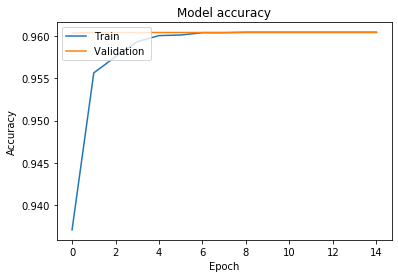

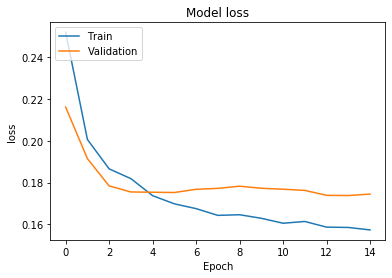

In [581]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation '],loc = 'upper left')
plt.show()

#Plot training and validation loss values 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper left')

plt.show()